In [2]:
import os

In [68]:
import numpy as np
import pandas as pd
from math import *

path = "../sim/results/"
file = "validation_3clk_mesh_18x10_MOD_DOR_mp_4_sv_3_sh_3_pir_500_ps_1_latency.log"

ve_tile_x = '[x][8][0]'
ve_tile_y = '[y][8][0]'

latencies = list()
lat_distribution = dict()

with open(path + file, 'r') as f:
  data_lines = f.readlines()
  for line in data_lines:
    if line.split()[0] == ve_tile_x or line.split()[0] == ve_tile_y:
      latency = int(line.split()[-1])
      latencies.append(latency)
  latencies_ = np.array(latencies)
  min_num = int(latencies_.size*0.95)
  latencies_.sort()
  latencies_=latencies_[:min_num]
  for line in data_lines:
    if line.split()[0] == ve_tile_x or line.split()[0] == ve_tile_y:
      mem_tile = line.split()[2]
      latency = int(line.split()[-1])
      if mem_tile not in lat_distribution.keys():
        lat_distribution[mem_tile] = list()
      if latency in latencies_:
        lat_distribution[mem_tile].append(latency)

data = np.array(latencies_)
min_num = int(data.size)
data.sort()
data=data[:min_num]
max_lat = data[-1]
print(np.mean(data))
print(sqrt(np.var(data)))
print(data.size)
print(max_lat)


94.35219497360818
64.63091361823525
92074
420


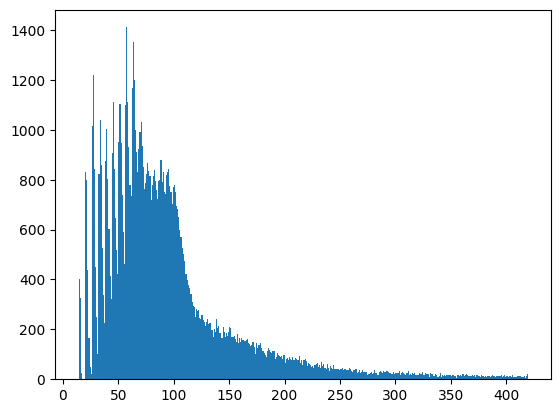

In [69]:
import matplotlib.pyplot as plt

bins = list(range(np.min(data)-1, np.max(data) + 1))

plt.hist(data, bins)
plt.show()

Text(104.35219497360818, 220, 'Variance: 64.63')

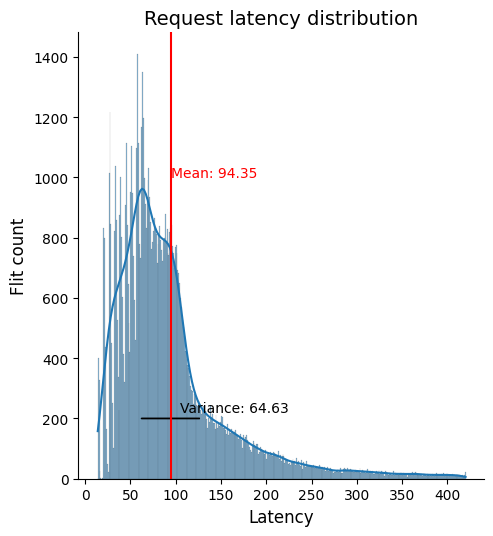

In [71]:
import seaborn as sns

plot = sns.displot(data=data, kde=True, bins=bins, legend=False)
plt.xlabel("Latency", size=12)
plt.ylabel("Flit count", size=12)
plt.title("Request latency distribution", size=14)
plt.axvline(x=data.mean(), color='red')
plt.arrow(
  x=data.mean()-sqrt(data.var())/2,
  y=200,
  dx=sqrt(data.var()),
  dy=0,
  color='black'
)
plt.text(x=data.mean()+1, y=1000, s=f"Mean: {format(data.mean(), '.2f') }", color='red')
plt.text(x=data.mean()+10, y=220, s=f"Variance: {format(sqrt(data.var()), '.2f') }", color="black")

In [72]:
stat_distribution = dict()

stat_distribution['Mem Node X'] = list()
stat_distribution['Mem Node Y'] = list()
stat_distribution['Mean'] = list()
stat_distribution['Variance'] = list()

for key in lat_distribution.keys():
  lat_distribution[key] = np.array(lat_distribution[key])
  lat_handled = list()
  for lat in lat_distribution[key]:
    if lat < max_lat:
      lat_handled.append(lat)
  lat_handled = np.array(lat_handled)
  x_line = key[:key.find(']')+1]
  y_line = key[key.find(']')+1:key.find(':')]
  stat_distribution['Mem Node X'].append(int(x_line[x_line.find('[')+1:x_line.find(']')]))
  stat_distribution['Mem Node Y'].append(int(y_line[y_line.find('[')+1:y_line.find(']')]))
  stat_distribution['Mean'].append(lat_handled.mean())
  stat_distribution['Variance'].append(sqrt(lat_handled.var()))

df = pd.DataFrame(stat_distribution)
df = df.sort_values(by=['Mem Node X', 'Mem Node Y'])
df.to_excel("lat.xlsx")